# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [11]:
# Your code here.
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

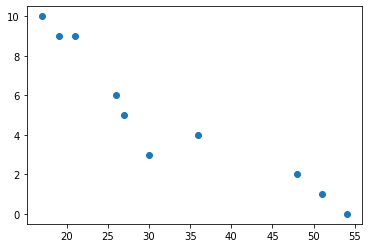

In [13]:
# Your code here.
plt.scatter(student_data['X'],student_data['Y'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [18]:
# Your response here. 
print('I see a negative trend in this scatter plot. (The first idea was right) H0: The younger my students are, the more often they are late to class')

I see a negative trend in this scatter plot. (The first idea was right) H0: The younger my students are, the more often they are late to class


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Your response here.
#correlation:
print('Correlation:')
display(student_data.corr())

#covariance:
print('Covariance:')
display(student_data.cov())

'''
The covariance of two variables X and Y is a measure of the joint variability of these random variables. If variables have positive covariance they tend to show similar behaviour.
Correlation is a similarity or equivalence that exists between two different hypotheses, situations or objects.
We can see that the correlation between both variables is negative (-0.94), so when a student's age increases, their lateness decreases.
Covariance between both variables is also negative (-45.6), so Age and Lateness tend to show opposite behaviour.
'''

Correlation:


,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


Covariance:


,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [23]:
# Your response here.

slope, intercept, r_value, p_value, std_err = stats.linregress(student_data['X'], student_data['Y'])

print ('The slope is: ' + str(slope))
print('We can see that the slope is negative which confirms our previous results about the correlation between both variables being negative. So when one goes up, the other goes down. The dependent variable is "Tardies". Im using a linear regression.' )

The slope is: -0.2428207709159808
We can see that the slope is negative which confirms our previous results about the correlation between both variables being negative. So when one goes up, the other goes down. The dependent variable is "Tardies". Im using a linear regression.


Plot your regression model on your scatter plot.

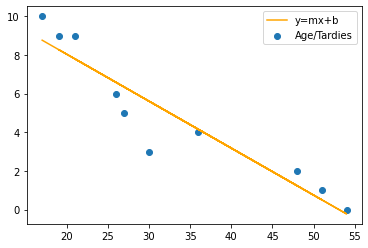

In [33]:
# Your code here.
plt.scatter(student_data['X'],student_data['Y'], label='Age/Tardies')
plt.plot(student_data['X'], slope*student_data['X'] + intercept, c='orange', label='y=mx+b')
plt.legend()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [41]:
# Your response here. 
print('p-value is: ' + str(p_value))
print('r-squared is: ' + str(r_value*r_value))

print('With the r-squared we can say that 88% of the variance in tardinees can be explained by the age. As for the p-value we can reject our hypothesis because the slope is very different from zero (So there is a relationship between them).')

p-value is: 5.56665383455343e-05
r-squared is: 0.8820265558250108
With the r-squared we can say that 88% of the variance in tardinees can be explained by the age. As for the p-value we can reject our hypothesis because the slope is very different from zero (So there is a relationship between them).


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [42]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

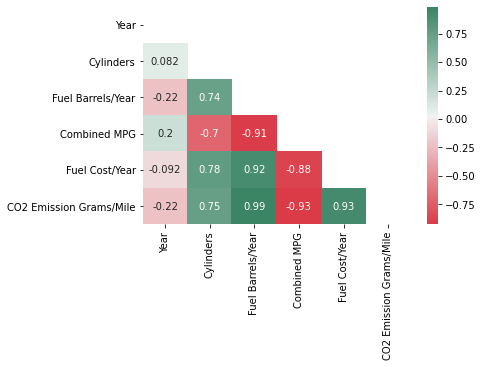

Fuel Barrels/Year is going to be the most important variable in determining CO2 emissions because is the furthest to zero. The variable Year provides the least amount of helpful information for determining CO2 emissions because is the one closer to zero.


In [53]:
# Your response here. 
correlation_vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()
correlation_vehicles

mask = np.triu(np.ones_like(correlation_vehicles, dtype=np.bool))

cmap = sns.diverging_palette(10, 150, as_cmap=True)

sns.heatmap(correlation_vehicles, cmap=cmap, mask=mask, annot= True)
plt.show()
print('Fuel Barrels/Year is going to be the most important variable in determining CO2 emissions because is the furthest to zero. The variable Year provides the least amount of helpful information for determining CO2 emissions because is the one closer to zero.')

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [56]:
# Your response here. 
#dependent variable and independent variables
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles['CO2 Emission Grams/Mile']

#using a linear regression model
lm = LinearRegression()
model = lm.fit(X,Y)

print('r-squared: ', lm.score(X,Y))

r-squared:  0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [61]:
# Your response here. 
print('r-squared: ', lm.score(X,Y))

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
display(coeff_df)

print('I have 98% confidence in this results. A unit increase in "Fuel Barrels/Year", increases 19.05 units in CO2 emissions. Similarly, a unit increase in "Cylinders" results in an increase of 1.87 units in CO2 emissions. However, a unit increase in "Combined MPG" results in a 3.04 units decrease in CO2 emissions.')

r-squared:  0.9808734920269122


,Coefficient
Year,-0.320617
Cylinders,1.878800
Fuel Barrels/Year,19.052925
Combined MPG,-3.040399
Fuel Cost/Year,0.032309


I have 98% confidence in this results. A unit increase in "Fuel Barrels/Year", increases 19.05 units in CO2 emissions. Similarly, a unit increase in "Cylinders" results in an increase of 1.87 units in CO2 emissions. However, a unit increase in "Combined MPG" results in a 3.04 units decrease in CO2 emissions.


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [65]:
# Your code here.
data = {'X':[1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]}
df = pd.DataFrame(data=data)
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

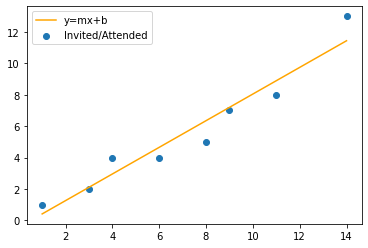

In [86]:
# Your code here.
slope, intercept, r_value, p_value, std_err = stats.linregress(df['X'], df['Y'])

plt.scatter(df['X'],df['Y'], label='Invited/Attended')
plt.plot(df['X'], slope*df['X'] + intercept, c='orange', label='y=mx+b')
plt.legend()



What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [87]:
# Your response here. 
print('It looks like there is a linear relationship between these variables.')
print('r-squared is: ' + str(r_value*r_value))
print('p-value is: ' + str(p_value))
print('Slope is: ' + str(slope))

It looks like there is a linear relationship between these variables.
r-squared is: 0.9316696375519905
p-value is: 0.00010236374464090686
Slope is: 0.8484848484848485


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [78]:
# Your response here. 
# I don't see any problematic points/ouliers, maybe the dot with the coordenates (14/13)?

X = np.array(df['X'][:-1]).reshape(-1, 1)
Y= df['Y'][:-1]
lm = LinearRegression()
model = lm.fit(X,Y)

Score (r-squared):  0.9433811802232854
Slope:  [0.68421053]


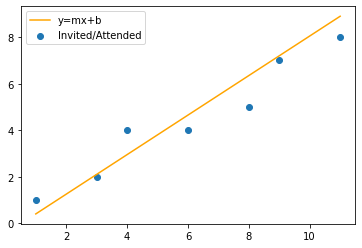

In [80]:
print('Score (r-squared): ', lm.score(X,Y))
print('Slope: ', lm.coef_)

plt.scatter(X,Y, label='Invited/Attended')
plt.plot(X, slope*X + intercept, c='orange', label='y=mx+b')
plt.legend()
#not sure if this is the way

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
print('According to the first model, almost everybody went to the party because the slope was 0.85. However when we took the outlier out the slope reduced to 0.68 (a major change in the result).')